In [26]:
# Import required packages

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Upload the automobile data
auto_df = pd.read_csv('automobile.txt', sep = ',')
# Display first 5 rows of data
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


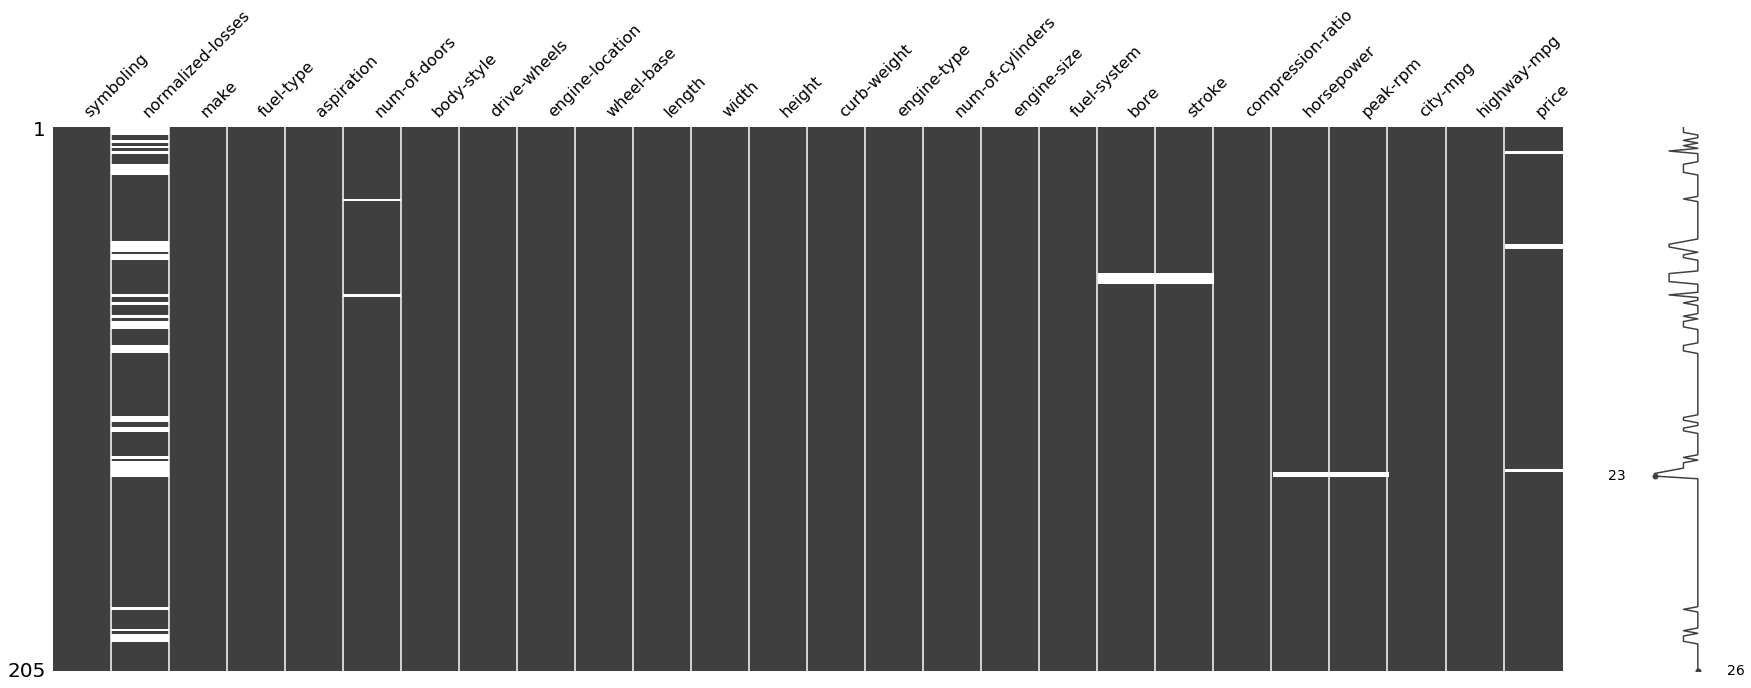

In [28]:
# The data contains "?", this needs to be changed to Nan values to check the amount of missing data
auto_data_df = auto_df.replace('?',np.NAN) 
# Plot graphic of missing values
missingno.matrix(auto_data_df, figsize = (30,10))

In [29]:
# get the number of missing data points per column
missing_values_count = auto_data_df.isnull().sum()

# look at the # of missing points in all the columns
print(missing_values_count)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [30]:
# Check the unique catogories each column has
auto_data_df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

In [45]:
# Replace missing data of normalised losses with the mean of the column
# Create temorary dataframe that contains the normalised_losses column without the '?' values
temp_df = auto_df[auto_df['normalized-losses']!= '?']
mean = temp_df['normalized-losses'].astype(int).mean()  #Determine mean of column
print(f'The mean was determined to be: {mean}')
auto_df['normalized-losses'] = auto_df['normalized-losses'].replace('?',mean).astype(int)
auto_df.head()

The mean was determined to be: 122.0


C:\Users\Arno\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [46]:
# Replace missing data of price with the mean of the column
# Create temorary dataframe that contains the price column without the '?' values
temp_df = auto_df[auto_df['price']!= '?']
mean = temp_df['price'].astype(int).mean()  #Determine mean of column
print(f'The mean was determined to be: {mean}')
auto_df['price'] = auto_df['price'].replace('?', mean).astype(int)
auto_df.head()

The mean was determined to be: 13207.126829268293


C:\Users\Arno\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [48]:
# Replace missing data of peak-rpm with the mean of the column
# Create temorary dataframe that contains the peak-rpm column without the '?' values
temp_df = auto_df[auto_df['peak-rpm']!= '?']
mean = temp_df['peak-rpm'].astype(int).mean()  #Determine mean of column
print(f'The mean was determined to be: {mean}')
auto_df['peak-rpm'] = auto_df['peak-rpm'].replace('?', mean).astype(int)
auto_df.head()

The mean was determined to be: 5125.365853658536


C:\Users\Arno\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [49]:
# Replace missing data of horsepower with the mean of the column
# Create temorary dataframe that contains the horsepower column without the '?' values
temp_df = auto_df[auto_df['horsepower']!= '?']
mean = temp_df['horsepower'].astype(int).mean()  #Determine mean of column
print(f'The mean was determined to be: {mean}')
auto_df['horsepower'] = auto_df['horsepower'].replace('?', mean).astype(int)
auto_df.head()

The mean was determined to be: 104.25365853658536


C:\Users\Arno\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [50]:
# Replace missing data of stroke with the mean of the column
# Create temorary dataframe that contains the stroke column without the '?' values
temp_df = auto_df[auto_df['stroke']!= '?']
mean = temp_df['stroke'].astype(float).mean()  #Determine mean of column
print(f'The mean was determined to be: {mean}')
auto_df['stroke'] = auto_df['stroke'].replace('?', mean).astype(float)
auto_df.head()

The mean was determined to be: 3.2554228855721337


C:\Users\Arno\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [51]:
# Replace missing data of bore with the mean of the column
# Create temorary dataframe that contains the bore column without the '?' values
temp_df = auto_df[auto_df['bore']!= '?']
mean = temp_df['bore'].astype(float).mean()  #Determine mean of column
print(f'The mean was determined to be: {mean}')
auto_df['bore'] = auto_df['bore'].replace('?', mean).astype(float)
auto_df.head()

The mean was determined to be: 3.329751243781096


C:\Users\Arno\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [62]:
# Replace missing data of num-of-doors with the mode of the columns since it is a string and not an integer
# Count the occurence of each entry in num-of-doors
print(auto_df['num-of-doors'].value_counts())

# From the count it can be seen that the mode of the num-of-doors is four
# Replace all '?' with four in the data
auto_df['num-of-doors'] = auto_df['num-of-doors'].replace('?', 'four')
auto_df.head()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


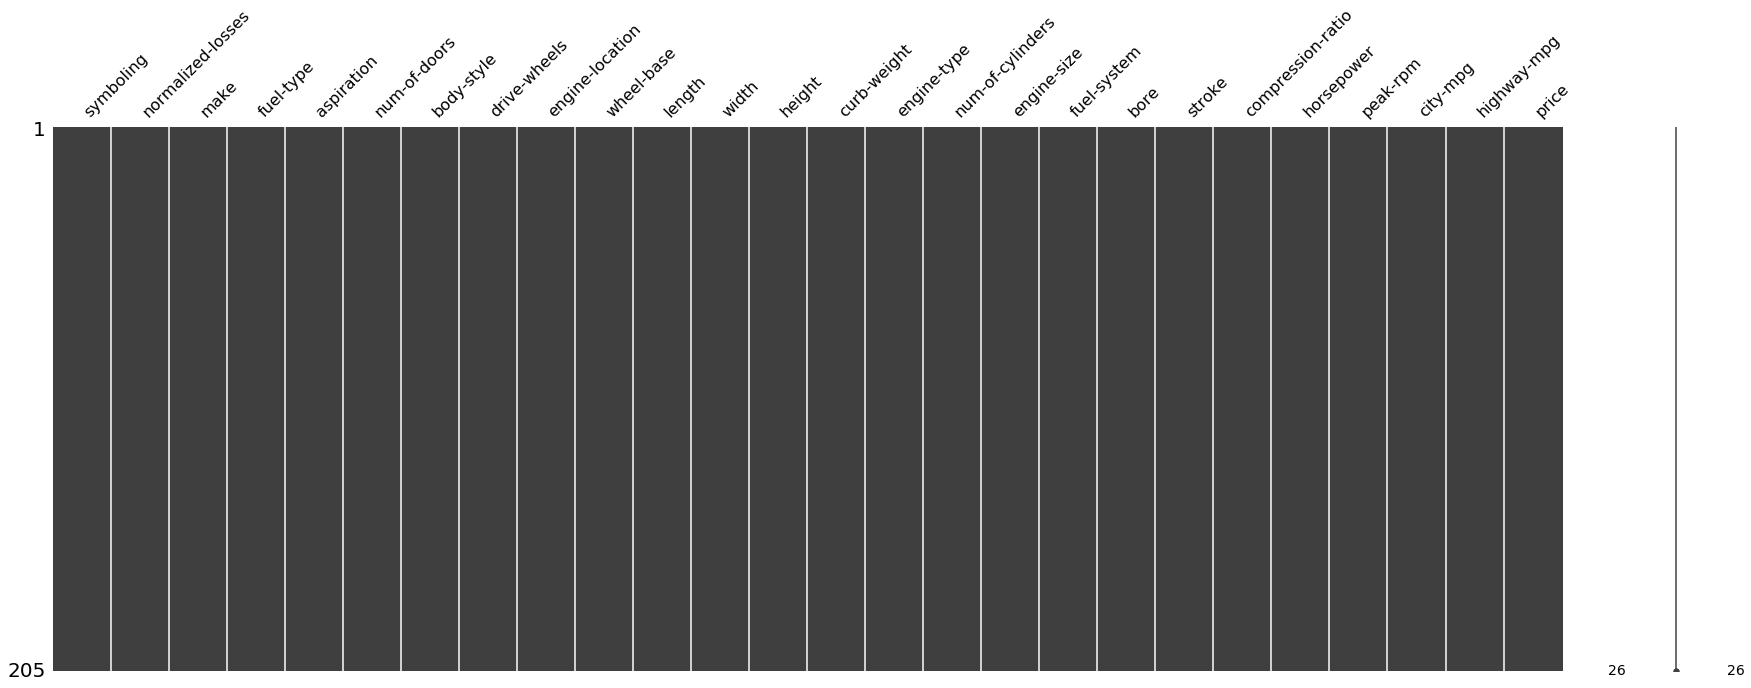

In [64]:
# Plot new graphic to see effect of changes
missingno.matrix(auto_df, figsize = (30,10))

In [65]:
# Get summary of statisitics for each column
auto_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


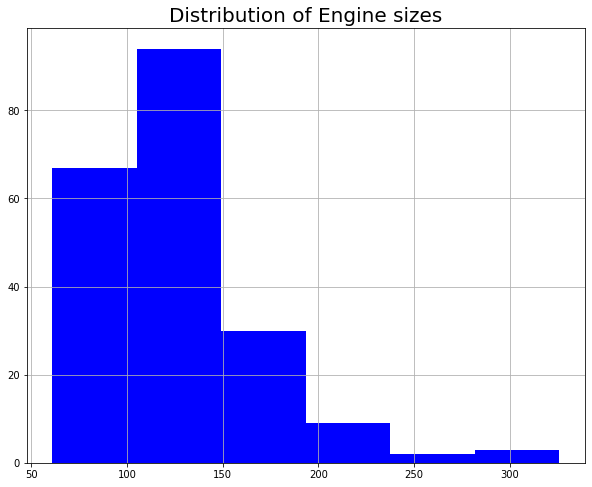

In [74]:
# Plot distribution of engine sizes
auto_df['engine-size'].hist(figsize=(10,8),bins=6,color='B')
plt.title('Distribution of Engine sizes', fontsize = 20)
plt.show()

From the graph it can be seen that the majority of cars have engine sizes between 60 and 190

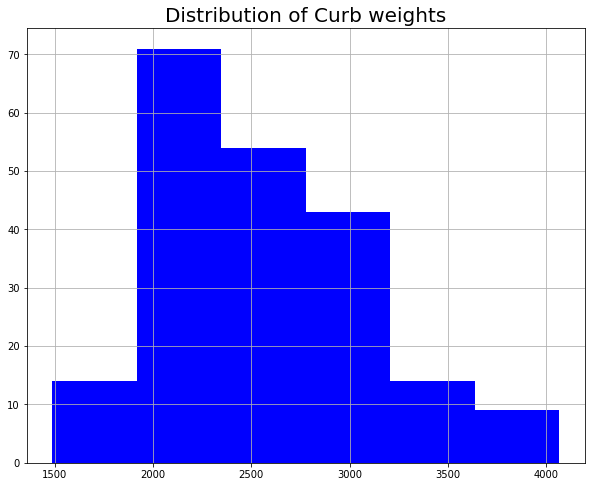

In [75]:
# Plot distribution of curb-weights
auto_df['curb-weight'].hist(figsize=(10,8),bins=6,color='B')
plt.title('Distribution of Curb weights', fontsize = 20)
plt.show()

Majority of the cars have a curb weight between 1900 and 3100

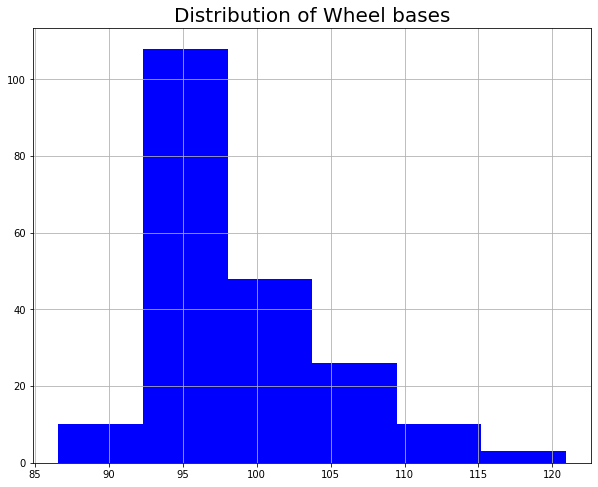

In [76]:
# Plot distribution of wheel-base
auto_df['wheel-base'].hist(figsize=(10,8),bins=6,color='B')
plt.title('Distribution of Wheel bases', fontsize = 20)
plt.show()

Majority of cars have a wheel base between 91 and 109

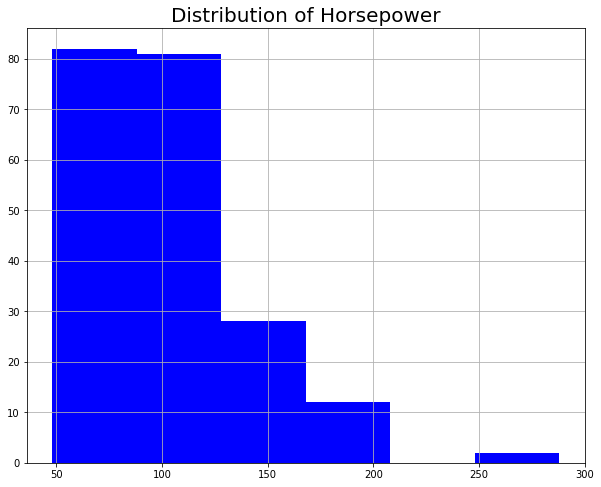

In [77]:
# Plot distribution of horsepower
auto_df['horsepower'].hist(figsize=(10,8),bins=6,color='B')
plt.title('Distribution of Horsepower', fontsize = 20)
plt.show()

Majority of cars have between 49 and 125 horsepower

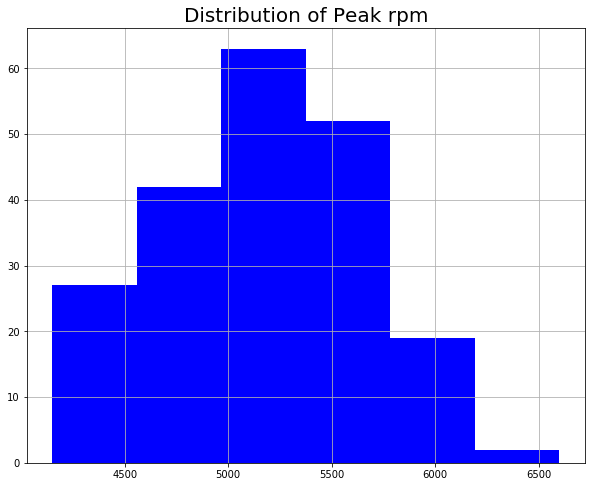

In [78]:
# Plot distribution of peak-rpm
auto_df['peak-rpm'].hist(figsize=(10,8),bins=6,color='B')
plt.title('Distribution of Peak rpm', fontsize = 20)
plt.show()

The majority of cars have a peak rpm between 4600 5750

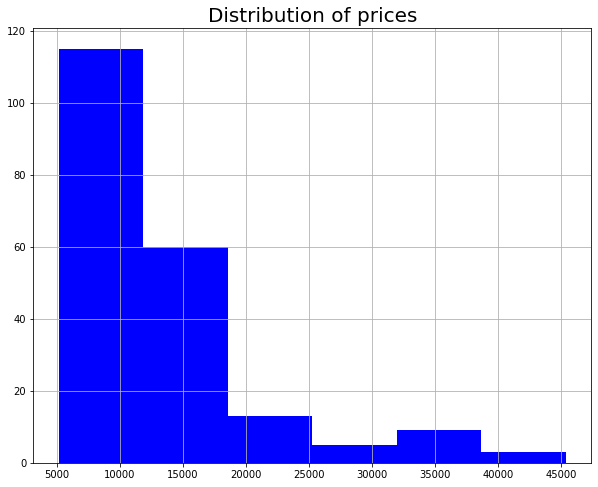

In [79]:
# Plot distribution of prices
auto_df['price'].hist(figsize=(10,8),bins=6,color='B')
plt.title('Distribution of prices', fontsize = 20)
plt.show()

Most of the cars cost between 5100 to 18000

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64


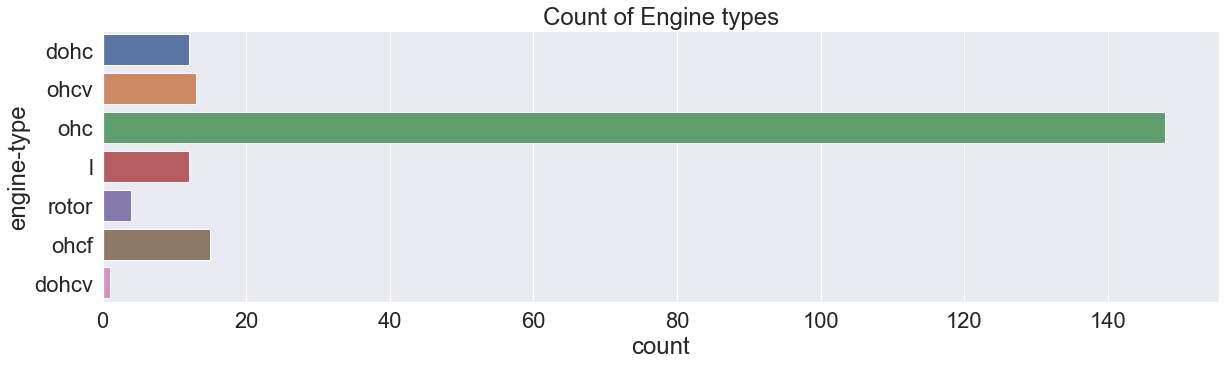

In [88]:
# Investigate the catogorial data
# Check the counts of engine types
fig = plt.figure(figsize=(20,5))
sns.set(font_scale=2)
sns.countplot(y='engine-type', data = auto_df).set(title='Count of Engine types');
print(auto_df['engine-type'].value_counts())

Over 70% of the cars have the Ohc engine type

four    116
two      89
Name: num-of-doors, dtype: int64


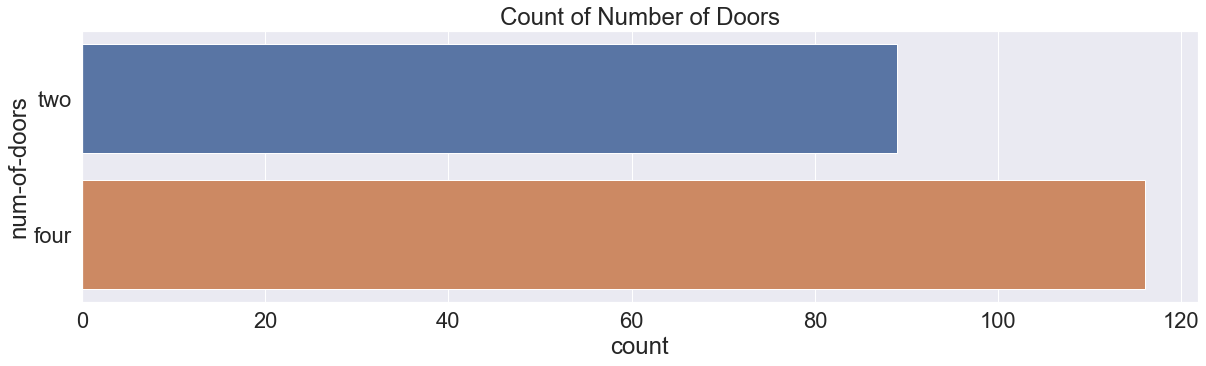

In [90]:
# Check the counts of number of doors
fig = plt.figure(figsize=(20,5))
sns.set(font_scale=2)
sns.countplot(y='num-of-doors', data = auto_df).set(title='Count of Number of Doors');
print(auto_df['num-of-doors'].value_counts())

Over 56% of the cars have four doors

gas       185
diesel     20
Name: fuel-type, dtype: int64


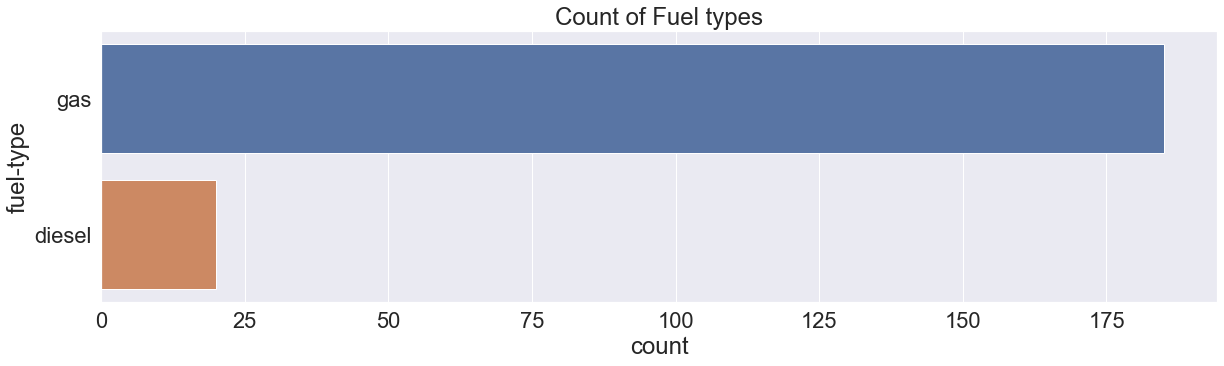

In [91]:
# Check the counts of fuel types
fig = plt.figure(figsize=(20,5))
sns.set(font_scale=2)
sns.countplot(y='fuel-type', data = auto_df).set(title='Count of Fuel types');
print(auto_df['fuel-type'].value_counts())

90% of the cars use gas as fuel

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


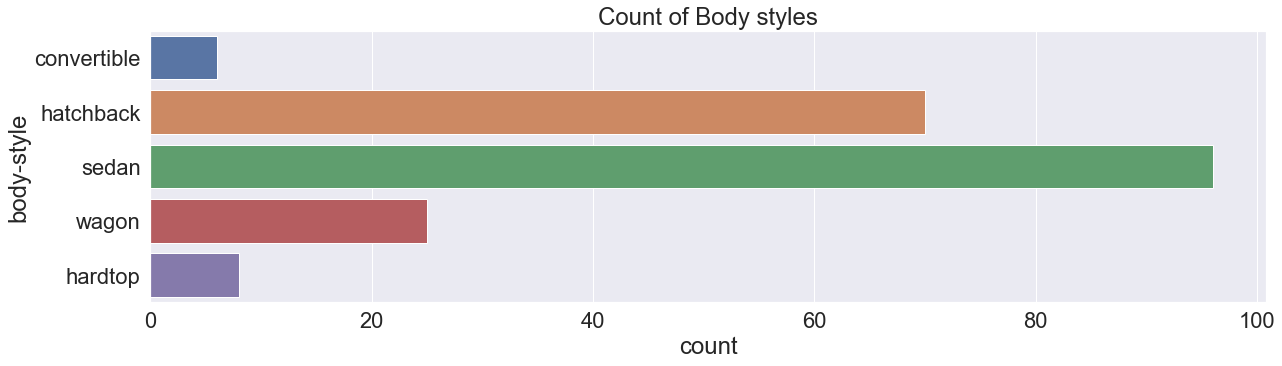

In [92]:
# Check the counts of body-style
fig = plt.figure(figsize=(20,5))
sns.set(font_scale=2)
sns.countplot(y='body-style', data = auto_df).set(title='Count of Body styles');
print(auto_df['body-style'].value_counts())

Most cars are of body style sedan around 48% which is then followed by hatchback at 32%

[Text(0.5, 1.0, 'Prices per brand')]

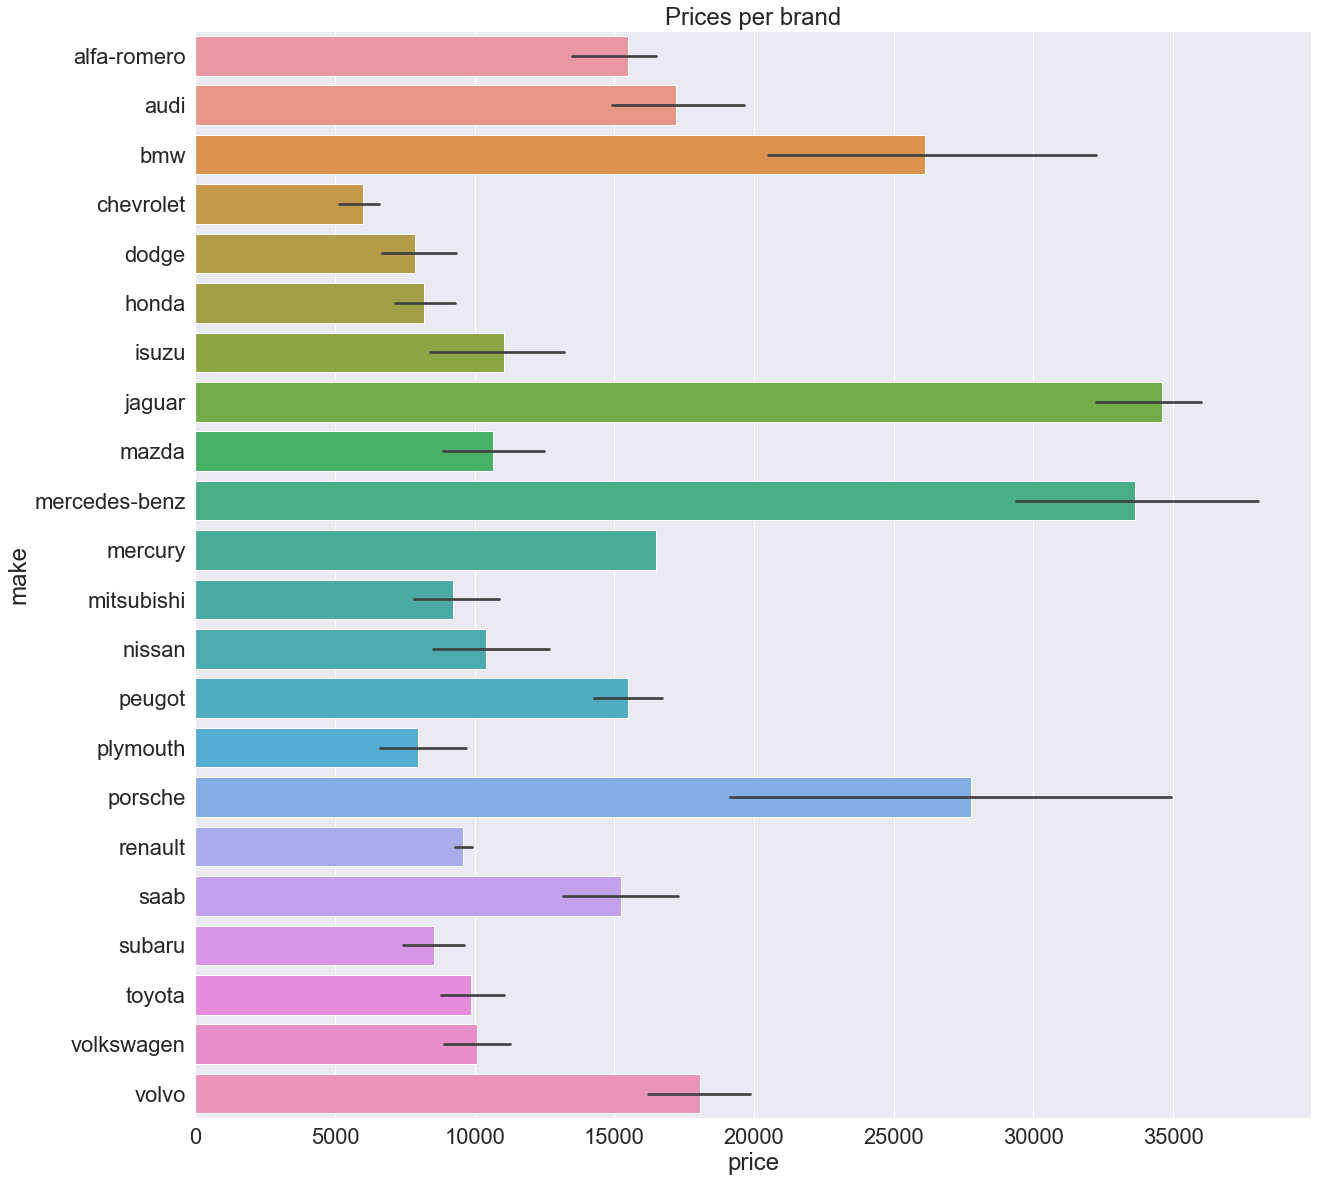

In [99]:
# Plot the brand vs the price
fig = plt.figure(figsize=(20,20))
sns.barplot(data=auto_df, x="price", y="make").set(title = 'Prices per brand')

The 5 most expensive brands are Jaguar, Mercedes-Benz, Porsche, BMW and Volvo. Cheverolet, Dodge, Honda, Mitbushi, Nissan, Plymouth, Subaru and Toyata manufacture the cheapest cars 

[Text(0.5, 1.0, 'Prices per type of car')]

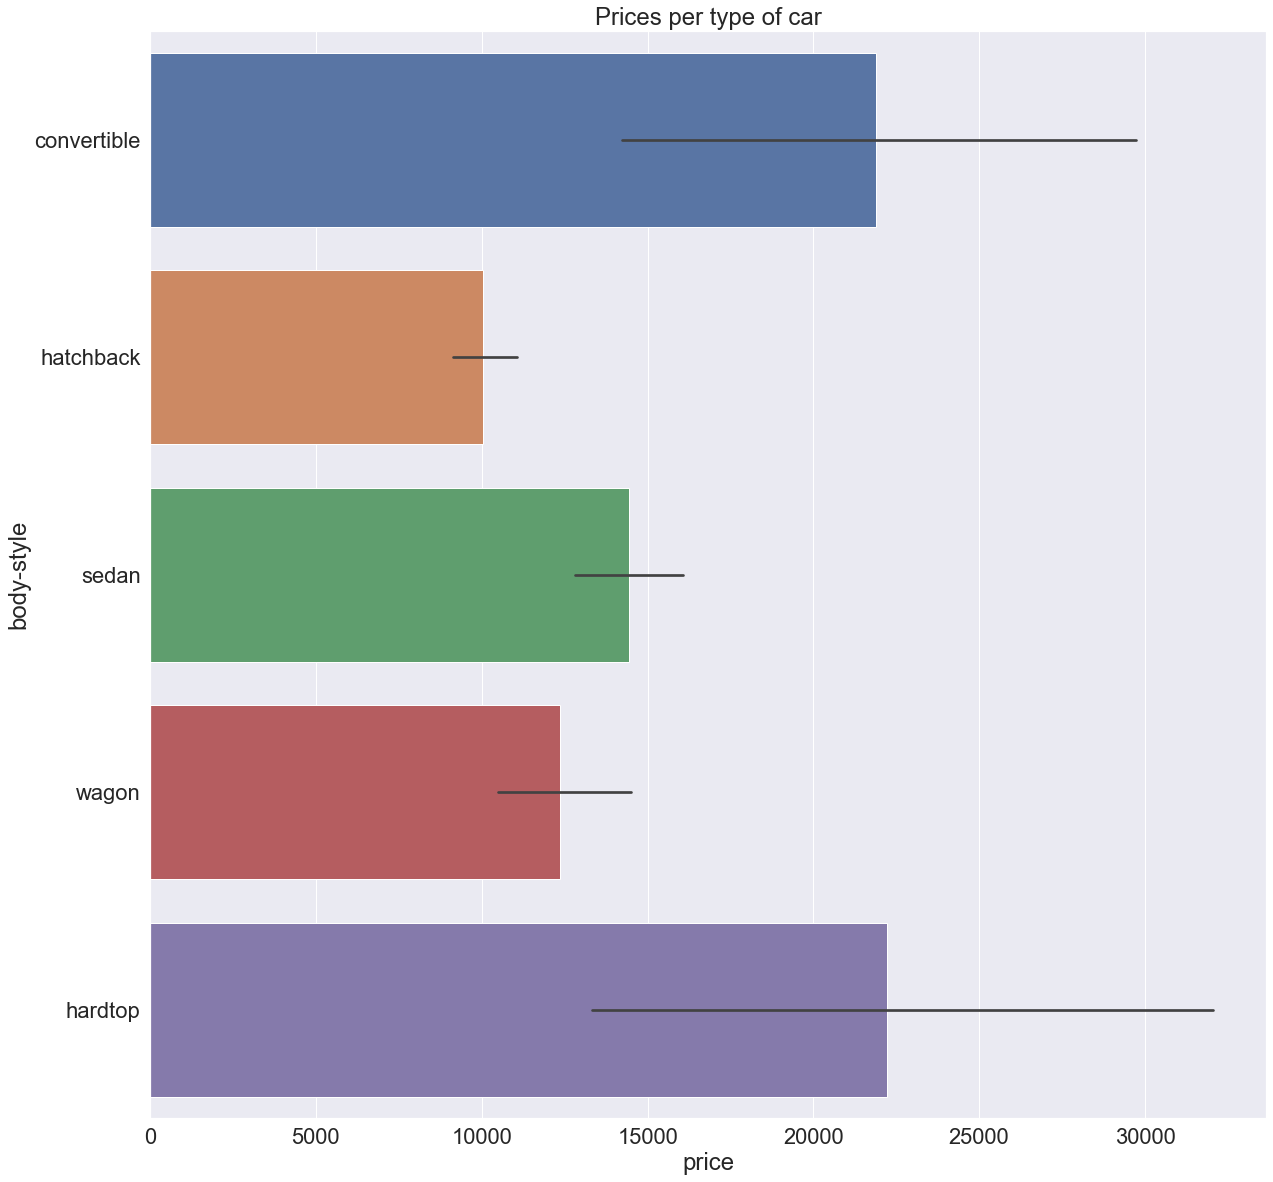

In [100]:
# Plot the body-style vs the price
fig = plt.figure(figsize=(20,20))
sns.barplot(data=auto_df, x="price", y="body-style").set(title = 'Prices per type of car')

Both convertibles (between 14000 and 29000) and hardtops(between 13000 and 32500) are the most expensive types of cars

[Text(0.5, 1.0, 'Prices per type of wheel drive')]

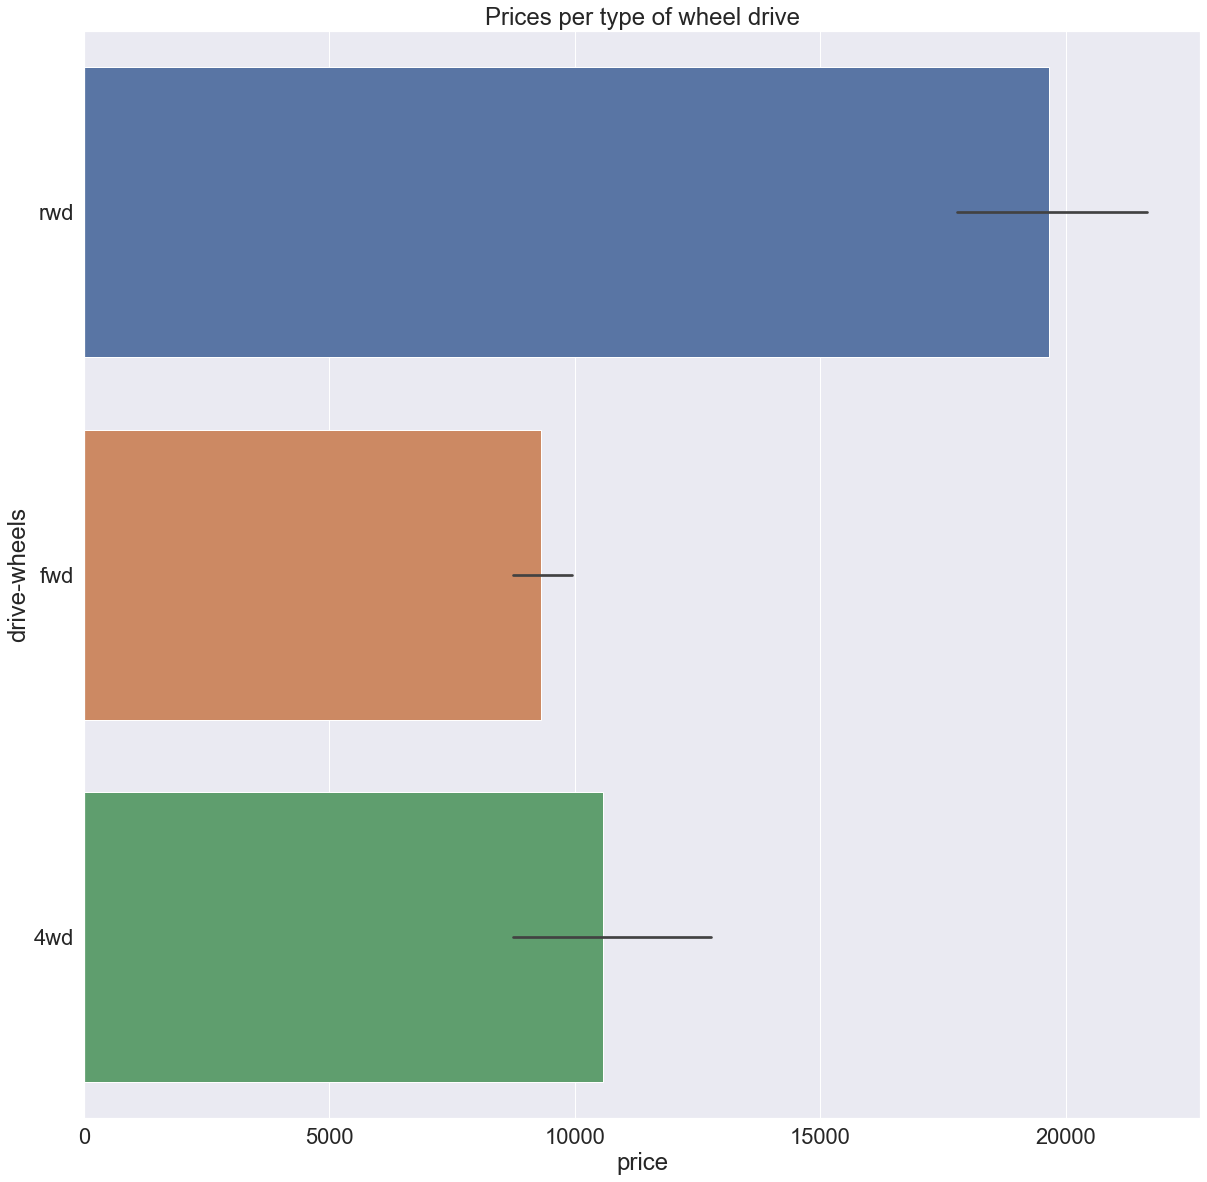

In [101]:
# Plot the body-style vs the drive-wheels
fig = plt.figure(figsize=(20,20))
sns.barplot(data=auto_df, x="price", y="drive-wheels").set(title = 'Prices per type of wheel drive')

Cars that have Rwd are the most expensive with prices between 16000 and 26000

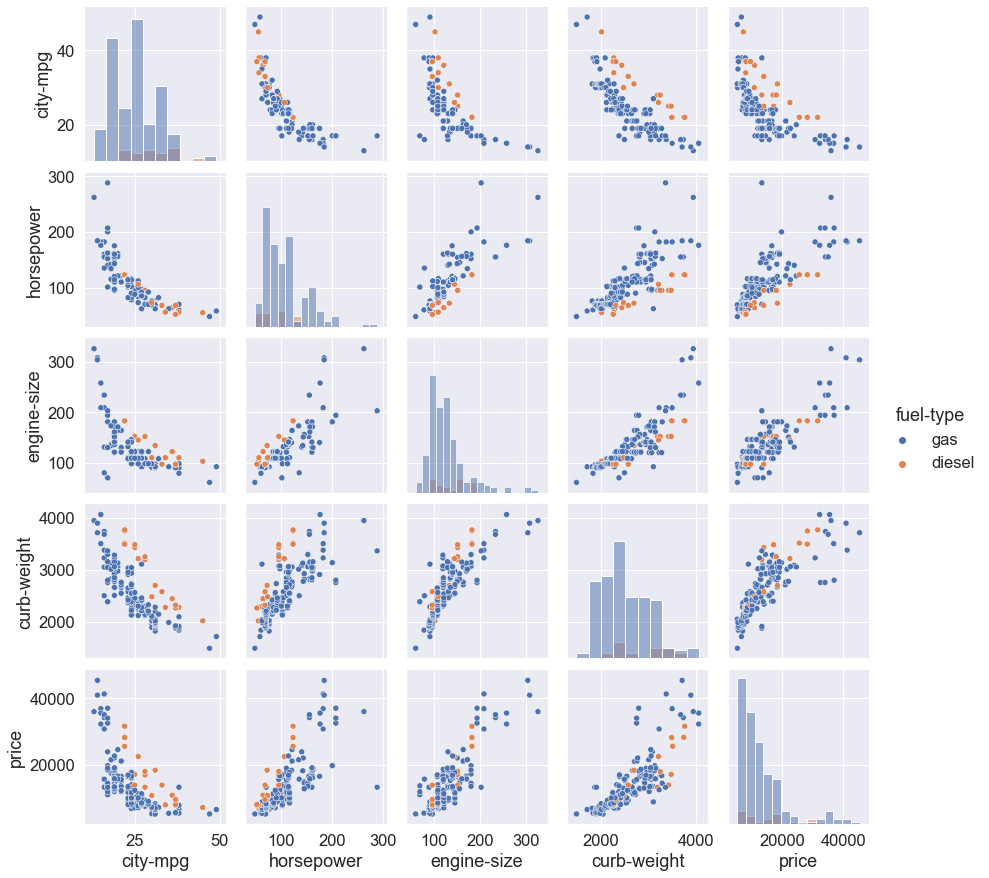

In [107]:
# Check the different sets of data for gas and diesel cars using a pairgrid
# Dataset to check is horespower, city-mpg, engine-size, curb-weight and price
sns.set(font_scale=1.5)
sns.pairplot(auto_df[["city-mpg", "horsepower", "engine-size", "curb-weight","price",
                      "fuel-type"]], hue="fuel-type", diag_kind="hist")

From the pairgrid the following can be seen
- The city-mpg (miles per gallon) decreases with horsepower, engine size, curb weight and price. This could be due to the fact that more expensive cars will have bigger engines and by extension more horsepower.
- To support the previous point it can be seen that the increase in horsepower leads to an increase in engine sizes
- The increase in the engine size also leads to an increase in the curb weight

<Figure size 1440x1440 with 0 Axes>

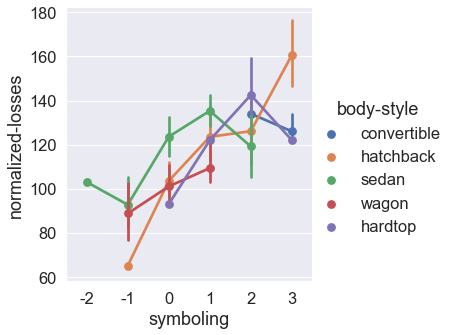

In [111]:
# Check the normalised losses of each body style
fig = plt.figure(figsize=(20,20))
sns.catplot(data=auto_df, y="normalized-losses", x="symboling" , hue="body-style" ,kind="point")

In this data the symboling refers to risk where a -2 is low risk and 3 is high risk
From the graph the following can be seen:
- A linear relationship can be seen between the risk rating and and the normalized losses. Indicating that the increase in normalized losses is directly correlated to an increase to the risk rating
- Both convertibles and hardtop cars only have a minimum risk rating 0
- Wagon cars have only a risk rating between -1 and 1 with normalised losses between 80 and 120
- Hatchback cars have the highest losses at a risk rating of 3, however hatchback cars with a risk rating of -1 have the lowest losses.